#Data Pre proccessing

In [2]:
# importing data set
import pandas as pd
df = pd.read_csv("/content/train (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()
a = df

In [5]:
# checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# checking duplication
df.duplicated().sum()

0

In [7]:
# taking mean of age column
age_mean = df.Age.mean()
age_mean

29.69911764705882

In [8]:
# dropping extra coulmns
df = df.drop(['PassengerId','Name','Fare','Ticket','Cabin'],axis=1)

In [9]:
# taking mean of embarked column
mod_embarked = df.Embarked.mode()
mod_embarked

0    S
Name: Embarked, dtype: object

In [10]:
# filling null values
df['Age'] = df['Age'].fillna(age_mean)

In [11]:
df['Embarked'] = df['Embarked'].fillna(mod_embarked[0])

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [13]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [14]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


##Model Training

In [15]:
# assigning input and output columns
x = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
y = df['Survived']

In [16]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# importing model and fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
# checking score of model
model.score(x_test,y_test)

0.7821229050279329

In [19]:
y_pred = model.predict(x_test)

y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1])

In [20]:
# comparing actual and predictions values
pd.DataFrame({"Actual": y_test, "Predictions": y_pred})


,Actual,Predictions
763,1,1
851,0,0
77,0,0
606,0,0
694,0,1
...,...,...
245,0,1
687,0,0
101,0,0
749,0,0


In [24]:
# checking precision score
from sklearn.metrics import precision_score
pre = precision_score(y_test,y_pred)
pre

0.696969696969697

In [25]:
# recall score
from sklearn.metrics import recall_score
rec = recall_score(y_test,y_pred)
rec

0.7076923076923077

In [26]:
# r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.05789473684210544

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

0.21787709497206703

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.21787709497206703

###Data Analyzing

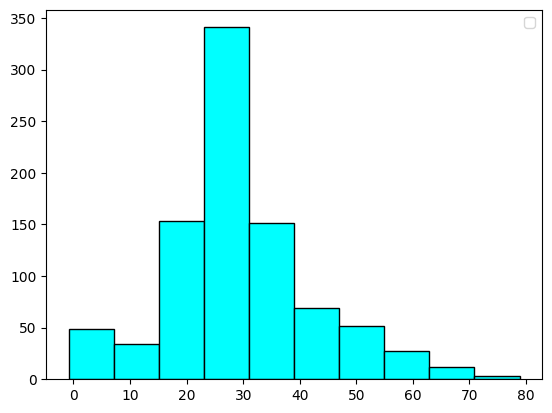

In [29]:
import matplotlib.pyplot as plt
import numpy as np
x = df['Age']
x = np.random.normal(x)

plt.hist(x , color='cyan', edgecolor='black')

plt.legend()
plt.show()


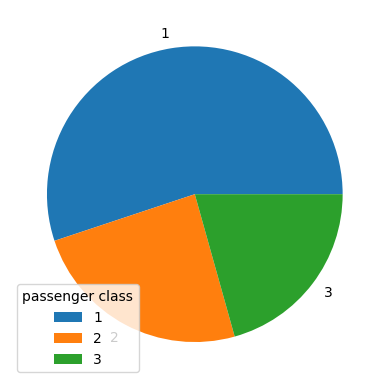

In [30]:
class_counts = df.Pclass.value_counts()
#x = np.array(df.Pclass)
class_labels = ['1','2','3']
plt.pie(class_counts,labels = class_labels)
plt.legend(title='passenger class')
plt.show()

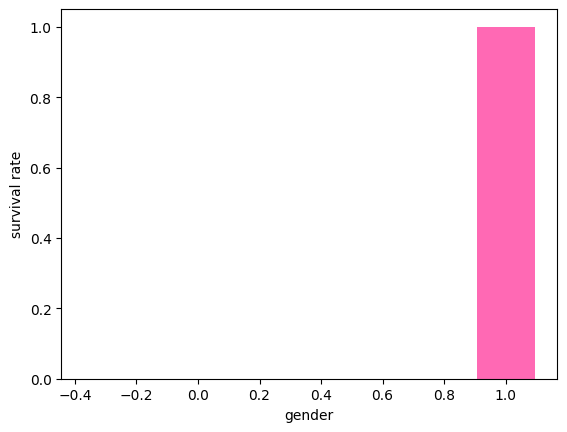

In [31]:
sur_by_gen = df.groupby('Sex')['Survived'].mean()
sur_by_gen
x=np.array([0,1])
plt.bar(x,sur_by_gen.index,sur_by_gen,color=['blue','hotpink'])
plt.xlabel('gender')
plt.ylabel('survival rate')
plt.show()
